# Introduction

The German ebay website [ebay Kleinazeigan](https://www.ebay-kleinanzeigen.de/) is used to, among many other things, sell used cars. When creating a used car listing on ebay, one may wonder:

- How does my milage affect the worth of my car? 
- Is my specific make/model of car highly valued on ebay? 
- How does the age of my car affect its value? 

In this project, we'll be taking a look at some used car data scraped from [ebay Kleinazeigan](https://www.ebay-kleinanzeigen.de/). After carefully cleaning the dataset, we use data visualization techniques to help us investigate the above questions. 

# About the Data 


The full dataset used in this project can be found [here](https://data.world/data-society/used-cars-data). For this notebook, we use only a subset (of size 50,000) of the full dataset. We also remark that the above link leads to a clean dataset. The version used in this notebook, however, is slightly dirtied, so we can better simulated what this freshly scraped dataset may have looked like. 

A data dictionary for this dataset is given by the following table:

|columnName | Description |
| ---------- | ------------| 
| dateCrawled | When this ad was first crawled. All field-values are taken from this date. |
| name | Name of the car. |
| seller | Whether the seller is private or a dealer. |
| offerType | The type of listing. |
| price | The price on the ad to sell the car. |
| abtest | Whether the listing is included in an A/B test. | 
| vehicleType | The vehicle Type. | 
| yearOfRegistration | The year in which the car was first registered. | 
| gearbox | The transmission type. | 
| powerPS | The power of the car in PS. |
| model | The car model name. | 
| odometer | How many kilometers the car has driven. |
| monthOfRegistration | The month in which the car was first registered. | 
| fuelType | What type of fuel the car uses. | 
| brand | The brand of the car. | 
| notRepairedDamage | If the car has a damage which is not yet repaired. | 
| dateCreated | The date on which the eBay listing was created. | 
| nrOfPictures | The number of pictures in the ad. |
| postalCode | The postal code for the location of the vehicle. | 
| lastSeenOnline | When the crawler saw this ad last online. |

# Initial Data Exploration 

We'll begin by reading in the data, and taking a look at the first few rows. Notice that We've used Windows-1252 encoding, as UTF-8 encoding will raise an error. 

In [1]:
import pandas as pd
import numpy as np
autos = pd.read_csv('data/autos.csv',encoding = 'Windows-1252')
autos.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,odometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-26 17:47:46,Peugeot_807_160_NAVTECH_ON_BOARD,privat,Angebot,"$5,000",control,bus,2004,manuell,158,andere,"150,000km",3,lpg,peugeot,nein,2016-03-26 00:00:00,0,79588,2016-04-06 06:45:54
1,2016-04-04 13:38:56,BMW_740i_4_4_Liter_HAMANN_UMBAU_Mega_Optik,privat,Angebot,"$8,500",control,limousine,1997,automatik,286,7er,"150,000km",6,benzin,bmw,nein,2016-04-04 00:00:00,0,71034,2016-04-06 14:45:08
2,2016-03-26 18:57:24,Volkswagen_Golf_1.6_United,privat,Angebot,"$8,990",test,limousine,2009,manuell,102,golf,"70,000km",7,benzin,volkswagen,nein,2016-03-26 00:00:00,0,35394,2016-04-06 20:15:37
3,2016-03-12 16:58:10,Smart_smart_fortwo_coupe_softouch/F1/Klima/Pan...,privat,Angebot,"$4,350",control,kleinwagen,2007,automatik,71,fortwo,"70,000km",6,benzin,smart,nein,2016-03-12 00:00:00,0,33729,2016-03-15 03:16:28
4,2016-04-01 14:38:50,Ford_Focus_1_6_Benzin_TÜV_neu_ist_sehr_gepfleg...,privat,Angebot,"$1,350",test,kombi,2003,manuell,0,focus,"150,000km",7,benzin,ford,nein,2016-04-01 00:00:00,0,39218,2016-04-01 14:38:50


To get an idea of missing values and datatypes, we use the pd.DataFrame.info().

In [2]:
autos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   dateCrawled          50000 non-null  object
 1   name                 50000 non-null  object
 2   seller               50000 non-null  object
 3   offerType            50000 non-null  object
 4   price                50000 non-null  object
 5   abtest               50000 non-null  object
 6   vehicleType          44905 non-null  object
 7   yearOfRegistration   50000 non-null  int64 
 8   gearbox              47320 non-null  object
 9   powerPS              50000 non-null  int64 
 10  model                47242 non-null  object
 11  odometer             50000 non-null  object
 12  monthOfRegistration  50000 non-null  int64 
 13  fuelType             45518 non-null  object
 14  brand                50000 non-null  object
 15  notRepairedDamage    40171 non-null  object
 16  date

Here are a few initial observations about the dataset: 
* There are missing values in 5 different columns, all of which have object datatype. 
* The number of missing values per column is fairly small. 
* There are 5 columns with time-related information.
* The columns are named using camelCase, as oppsed to snake_case.
* Some column names are not intuitive.

First, let's fix the column names, We'll convert all columns to snake_case, and make a few names a bit more intuitive.

In [3]:
autos.columns = ['date_crawled', 'name', 'seller', 'offer_type', 'price', 'ab_test',
       'vehicle_type', 'registration_year', 'gear_box', 'power_ps', 'model',
       'odometer', 'registration_month', 'fuel_type', 'brand',
       'unrepaired_damage', 'date_created', 'nr_of_pictures', 'postal_code',
       'last_seen']

We'll now use the pd.DataFrame.describe() method to take a closer look. 

In [4]:
autos.describe(include = 'all')

,date_crawled,name,seller,offer_type,price,ab_test,vehicle_type,registration_year,gear_box,power_ps,model,odometer,registration_month,fuel_type,brand,unrepaired_damage,date_created,nr_of_pictures,postal_code,last_seen
count,50000,50000,50000,50000,50000,50000,44905,50000.000000,47320,50000.000000,47242,50000,50000.000000,45518,50000,40171,50000,50000.0,50000.000000,50000
unique,48213,38754,2,2,2357,2,8,NaN,2,NaN,245,13,NaN,7,40,2,76,NaN,NaN,39481
top,2016-04-02 11:37:04,Ford_Fiesta,privat,Angebot,$0,test,limousine,NaN,manuell,NaN,golf,"150,000km",NaN,benzin,volkswagen,nein,2016-04-03 00:00:00,NaN,NaN,2016-04-07 06:17:27
freq,3,78,49999,49999,1421,25756,12859,NaN,36993,NaN,4024,32424,NaN,30107,10687,35232,1946,NaN,NaN,8
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2005.073280,NaN,116.355920,NaN,NaN,5.723360,NaN,NaN,NaN,NaN,0.0,50813.627300,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,105.712813,NaN,209.216627,NaN,NaN,3.711984,NaN,NaN,NaN,NaN,0.0,25779.747957,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1000.000000,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,0.0,1067.000000,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1999.000000,NaN,70.000000,NaN,NaN,3.000000,NaN,NaN,NaN,NaN,0.0,30451.000000,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2003.000000,NaN,105.000000,NaN,NaN,6.000000,NaN,NaN,NaN,NaN,0.0,49577.000000,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2008.000000,NaN,150.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,0.0,71540.000000,NaN


Here are some observations regarding the above output:

* seller, offer_type, and nr_of_pictures columns can likely be dropped.
* odometer entries should be changed to numeric.
* similar to odometer, the price column should be converted to a numeric datatype.
* a price of 0 occurs 1421 times, which seems quite strange. We'll have to investigate this further.

We'll address the above bullet points one-by-one, in more detail, below. 

### Dropping Columns

Notice that the "seller" column contains 2 unique values, 49,999 of which are "privat." This column can be dropped. Similarly, the "offer_type" can be dropped. 

In [5]:
autos = autos.drop(['seller','offer_type'], axis = 1)

From the statistics of the "nr_of_pictures" column, we see there are no missing values, and that every value is 0. This column can be dropped as well. 

In [6]:
autos = autos.drop(['nr_of_pictures'], axis = 1)

### Cleaning the Odometer Column

It's much more natural to have the column name indicate the units of the odometer, and the entries be numeric. Let's do this. First, we'll rename the column to indicate that the units are in kilometers. 

In [7]:
autos.rename(columns = {'odometer': 'odometer_km'}, inplace= True)

Now, let's check to make sure that every entry has 'km' as the final two characters. If this is the case, we can just remove those two characters, and convert the column to numeric. 

In [8]:
autos['odometer_km'].str[-2:].value_counts()

km    50000
Name: odometer_km, dtype: int64

This is indeed the case, so we can remove the last two characters and convert the column to numeric. We'll also have to remove any commas.

In [9]:
autos['odometer_km'] = autos['odometer_km'].str[:-2].str.replace(',','').astype(int)

### Cleaning the Price Column 
We noticed by using the DataFrame.describe() method that the price column should be converted to a numeric datatype. Let's take a closer look at this column. 

In [10]:
autos['price'].value_counts()

$0         1421
$500        781
$1,500      734
$2,500      643
$1,000      639
           ... 
$414          1
$79,933       1
$5,198        1
$18,890       1
$16,995       1
Name: price, Length: 2357, dtype: int64

Before any more in depth analysis, let's convert this column to numeric. We'll simply remove any commas and dollar signs, then convert to numeric. 

In [11]:
autos['price'] = autos.loc[:,
    'price'].str.replace(',','',regex=False
        ).str.replace('$','',regex = False
            ).astype(int)

Let's take a closer look at the distribution of values for price.  

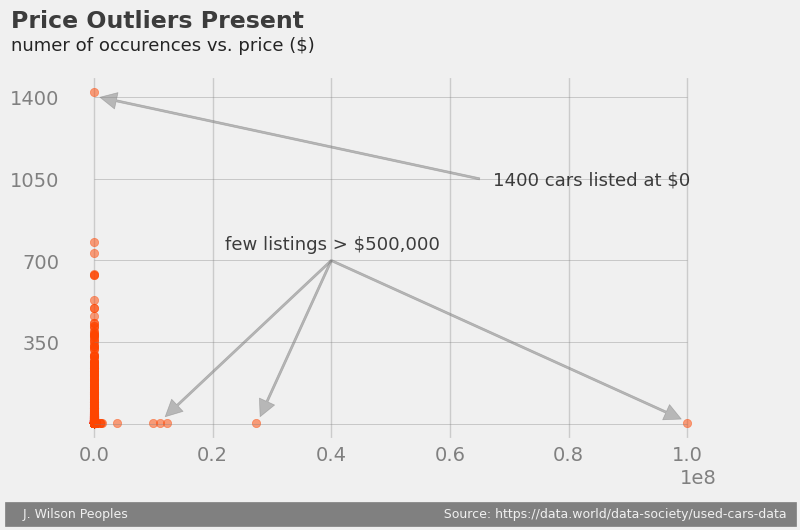

In [12]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
plt.style.use('fivethirtyeight')
fig,ax = plt.subplots(figsize = (7.5,4.5))
ax.scatter(autos['price'].value_counts().index, autos['price'].value_counts().values,color = 'orangered', alpha = .5)
ax.ticklabel_format(axis='x', style='sci', scilimits = (0,0))
#___________________________________________________________
#remove ticks and format legend
ax.grid(visible= False, axis = 'y')
ax.set_yticklabels([])
ax.tick_params(colors = 'grey', which = 'both')
#___________________________________________________________
#create title and subtitle
ax.text(-.14e8,1700, 'Price Outliers Present', weight = 'bold', size = 17, alpha = .75)
ax.text(-.14e8,1600, 'numer of occurences vs. price ($)', alpha = .85, size = 13)
ax.set_yticks([0,350,700,1050,1400])
ax.set_yticklabels(['','350','700','1050','1400'])
ax.hlines([0,350,700,1050,1400], xmin = 0,xmax=1e8, linewidth = .5, color = 'grey',alpha = .5)
ax.text(x = -.14e8, y = -400,
    s = '   J. Wilson Peoples                                                                               Source: https://data.world/data-society/used-cars-data ',
    fontsize = 9, color = '#f0f0f0', backgroundcolor = 'grey')
ax.annotate("", xy=(1e8-.01e8, 20), xytext=(.4e8,700),
            arrowprops=dict(width = 1.5, color = 'grey',alpha = .5))
ax.annotate("", xy=(.11e8+.01e8, 30), xytext=(.4e8,700),
            arrowprops=dict(width = 1.5, color = 'grey',alpha = .5))

ax.annotate("", xy=(.01e8, 1400), xytext=(.65e8,1050), alpha = .85,
            arrowprops=dict(width = 1.5, color = 'grey',alpha = .5))
ax.text(.673e8, 1025,"1400 cars listed at $0",size = 13, alpha = .75)

ax.annotate("", xy=(.27e8+.01e8, 30), xytext=(.4e8,700), alpha = .85,
            arrowprops=dict(width = 1.5, color = 'grey',alpha = .5))
ax.text(.22e8, 750,"few listings > $500,000",size = 13, alpha = .75)

ax.grid(visible = False, axis = 'y')

We notice a couple of things:
- Prices initially rise gradually, then jump around .5*(1e6)
- There are 1400 occurences of price $0, while the next most frequently occuring price is $500. 

Let's first look more closely at the outliers. 

In [13]:
autos.loc[autos['price'] > .5*(1e6)]

,date_crawled,name,price,ab_test,vehicle_type,registration_year,gear_box,power_ps,model,odometer_km,registration_month,fuel_type,brand,unrepaired_damage,date_created,postal_code,last_seen
514,2016-03-17 09:53:08,Ford_Focus_Turnier_1.6_16V_Style,999999,test,kombi,2009,manuell,101,focus,125000,4,benzin,ford,nein,2016-03-17 00:00:00,12205,2016-04-06 07:17:35
2897,2016-03-12 21:50:57,Escort_MK_1_Hundeknochen_zum_umbauen_auf_RS_2000,11111111,test,limousine,1973,manuell,48,escort,50000,3,benzin,ford,nein,2016-03-12 00:00:00,94469,2016-03-12 22:45:27
7814,2016-04-04 11:53:31,Ferrari_F40,1300000,control,coupe,1992,NaN,0,NaN,50000,12,NaN,sonstige_autos,nein,2016-04-04 00:00:00,60598,2016-04-05 11:34:11
11137,2016-03-29 23:52:57,suche_maserati_3200_gt_Zustand_unwichtig_laufe...,10000000,control,coupe,1960,manuell,368,NaN,100000,1,benzin,sonstige_autos,nein,2016-03-29 00:00:00,73033,2016-04-06 21:18:11
22947,2016-03-22 12:54:19,Bmw_530d_zum_ausschlachten,1234566,control,kombi,1999,automatik,190,NaN,150000,2,diesel,bmw,NaN,2016-03-22 00:00:00,17454,2016-04-02 03:17:32
24384,2016-03-21 13:57:51,Schlachte_Golf_3_gt_tdi,11111111,test,NaN,1995,NaN,0,NaN,150000,0,NaN,volkswagen,NaN,2016-03-21 00:00:00,18519,2016-03-21 14:40:18
27371,2016-03-09 15:45:47,Fiat_Punto,12345678,control,NaN,2017,NaN,95,punto,150000,0,NaN,fiat,NaN,2016-03-09 00:00:00,96110,2016-03-09 15:45:47
37585,2016-03-29 11:38:54,Volkswagen_Jetta_GT,999990,test,limousine,1985,manuell,111,jetta,150000,12,benzin,volkswagen,ja,2016-03-29 00:00:00,50997,2016-03-29 11:38:54
39377,2016-03-08 23:53:51,Tausche_volvo_v40_gegen_van,12345678,control,NaN,2018,manuell,95,v40,150000,6,NaN,volvo,nein,2016-03-08 00:00:00,14542,2016-04-06 23:17:31
39705,2016-03-22 14:58:27,Tausch_gegen_gleichwertiges,99999999,control,limousine,1999,automatik,224,s_klasse,150000,9,benzin,mercedes_benz,NaN,2016-03-22 00:00:00,73525,2016-04-06 05:15:30


Looking at the name column, some of these listing could be reasonable. For instance, multiple listings include Ferrari or Maserati in the name.  

However, for our analysis, we wish to consider more reasonably priced cars. So we'll drop these values. We'll also drop the entries with a price of $0. Since we're trying to use the data to determine an optimal price for selling a car, removing these outliers is likely neccesary. Altogether, dropping these values only removes ~2% of the data. Moreover, the remaining data is more relevant to our analysis. 

In [14]:
autos = autos.loc[autos['price'] != 0 ,:]
autos = autos.loc[autos['price'] < .5*(1e6) ,:]

This concludes the initial data cleaning process. Next, we'll try to fill in as many missing values as we can. 

# Filling Missing Values

Let's start by counting the number of missing values per column. 

In [15]:
autos.isna().sum(axis = 0)

date_crawled             0
name                     0
price                    0
ab_test                  0
vehicle_type          4586
registration_year        0
gear_box              2343
power_ps                 0
model                 2458
odometer_km              0
registration_month       0
fuel_type             4030
brand                    0
unrepaired_damage     9101
date_created             0
postal_code              0
last_seen                0
dtype: int64

We see there are only five columns with missing values:
- unrepaired_damage
- vehicle_type 
- fuel_type 
- model 
- gear_box

We'll start by looking at the column with the most missing values. 

### Missing Values in the unrepaired_damage Column

Let's look at the distribution of answers for this column.


In [16]:
autos['unrepaired_damage'].value_counts(dropna = False)

nein    34775
NaN      9101
ja       4689
Name: unrepaired_damage, dtype: int64

We see that "nein" is about 7 times more common than "ja." In this case, its probably safe to fill all missing values with the mode for this column. 

In [17]:
autos = autos.replace({'unrepaired_damage': {'nein': False, 'ja': True, np.nan: False}})

### Missing Values in the vehicle_type Column

Let's look at the distribution of answers in the vehicle_type column. 

In [18]:
autos['vehicle_type'].value_counts(dropna = False)

limousine     12598
kleinwagen    10585
kombi          8931
NaN            4586
bus            4031
cabrio         3016
coupe          2463
suv            1965
andere          390
Name: vehicle_type, dtype: int64

For this column, the top answers occur a similar number of times. In this case, However, the model for a car may give us a better idea for the vehicle type. For instance, let's look at the distribution of vehicle_type when the model is a golf. 

In [19]:
mask = (autos['model'] == 'golf')
autos[mask]['vehicle_type'].value_counts()

limousine     2003
kleinwagen     518
kombi          429
cabrio         279
bus            102
coupe           56
andere          21
suv              6
Name: vehicle_type, dtype: int64

Here, we see that the vehicle type of golf's are about 4 times more likely to be limousine than the next most frequent answer. Hence, vehicle_type is related to the model. Intuitively, it makes sense to fill the missing vehicle_type with the most frequent vehicle type for that specific model. When both are missing, however, we'll simply drop those responses. To summarize, we will:

- drop row when model and vtype are missing.
- otherwise, fill vtype with most frequent vtype for that specific model. 

In [20]:
#extract rows with missing vehicle type 
vehicle_type_missing = autos[autos['vehicle_type'].isna()]

#get list of possible models when vehicle_type is missing 
model_when_vtype_missing = vehicle_type_missing['model'].value_counts().index

#_____________________________________
#create disctionary mapping model to most freqeunt vehicle type for that model 
#among original DataFrame
filling_dict = {}
for model in model_when_vtype_missing:
    filling_dict[model] = autos[                            #in original DataFrame
        autos['model'] == model][                           #extract all entries of given model
            'vehicle_type'                                  #look at vehicle_type column 
                ].value_counts(dropna = False).index[0]     #extract most frequent occurence 
#_____________________________________
#use dictionary to obtain values to fill
filling_values = vehicle_type_missing['model'].replace(filling_dict)

#fill missing values
autos['vehicle_type'] = autos.loc[:,'vehicle_type'].fillna(filling_values)

#drop rows where vehicle_type is still missing 
autos = autos.loc[~autos['vehicle_type'].isna(),:]

Now, we'll move onto looking at the listing where the model is missing. 

### Missing Values in the model Column
Let's take a look at how many missing values there still are in this column. 

In [21]:
autos['model'].value_counts(dropna = False)

golf          3900
andere        3443
3er           2686
NaN           1740
polo          1688
              ... 
145              2
kappa            2
rangerover       1
200              1
b_max            1
Name: model, Length: 244, dtype: int64

Before deciding how to fill these values, let's take a closer look at some of these entries. 

In [22]:
autos[autos['model'].isna()].head()

,date_crawled,name,price,ab_test,vehicle_type,registration_year,gear_box,power_ps,model,odometer_km,registration_month,fuel_type,brand,unrepaired_damage,date_created,postal_code,last_seen
15,2016-04-01 12:06:20,Corvette_C3_Coupe_T_Top_Crossfire_Injection,18900,test,coupe,1982,automatik,203,NaN,80000,6,benzin,sonstige_autos,False,2016-04-01 00:00:00,61276,2016-04-02 21:10:48
23,2016-03-10 19:55:34,Peugeot_Boxer_2_2_HDi_120_Ps_9_Sitzer_inkl_Klima,7999,control,bus,2010,manuell,120,NaN,150000,2,diesel,peugeot,False,2016-03-10 00:00:00,30900,2016-03-17 08:45:17
25,2016-03-21 21:56:18,Ford_escort_kombi_an_bastler_mit_ghia_ausstattung,90,control,kombi,1996,manuell,116,NaN,150000,4,benzin,ford,True,2016-03-21 00:00:00,27574,2016-04-01 05:16:49
41,2016-03-10 10:46:08,Passat_3b_1.9_TDI_Highline__angemeldet_mit_tuv...,3200,test,kombi,2003,manuell,131,NaN,150000,7,NaN,volkswagen,False,2016-03-10 00:00:00,28259,2016-04-06 20:19:08
60,2016-03-23 21:55:29,VW_Vento_1_8_Tuev_NEU,1199,test,limousine,1996,NaN,90,NaN,150000,0,benzin,volkswagen,False,2016-03-23 00:00:00,1665,2016-04-06 05:45:36


A key observation is that the name column often includes information about the model. For instance, looking at index of 25, we see that this listing is a ford escort. However, the model is missing. Hence, we can use the information in the name column to fill the information in the model column. Since we'll end up doing this method for multiple other columns, let's write a function that accomplishes our goal. 

In [23]:
#function that takes in a DataFrame, and two strings corresponding to column names 
#Fills missing values in the second column if the first column contains an string
#used in the second column as a substring
#________________________________________
def name_based_fill(df, name, column):
    sub_strings = df[column].value_counts().index.tolist()
    for string in sub_strings:
        #______________________________________
        #filter for rows with missing entry in column 
        na_mask = df[column].isna() 
        #filter for rows whose name contains string as a substring
        contains_mask = df[name].str.lower().str.replace('_','').str.contains(string)
        #_______________________________________
        #update column
        values = df[na_mask & contains_mask][column].fillna(string)
        df[column] = df.loc[:,column].fillna(value = values)


Now, let's plug in our dataframe and columns to update the missing values. 

In [24]:
name_based_fill(autos, 'name', 'model')

Let's see how much data that method was able to fill in by looking at the remaining number of null values in the model column. 

In [25]:
autos['model'].isna().sum()

568

That filled over 1000 values! Not bad. We'll go ahead and drop the rows where the model is still missing. 

In [26]:
autos = autos[~autos['model'].isna()]

### Missing Values in the fuel_type Column 

Let's take a look at the answers for this column. 

In [27]:
autos['fuel_type'].value_counts(dropna = False)

benzin     28834
diesel     14183
NaN         3473
lpg          647
cng           70
hybrid        34
elektro       18
andere        14
Name: fuel_type, dtype: int64

benzin and diesel are by far the most common. This column is a good candidate to just fill in any missing values with benzin. Before doing this, however, let's see if we can use the name to fill in some of these as well. 

In [28]:
name_based_fill(autos, 'name', 'fuel_type')
#count remaining missing values
autos['fuel_type'].isna().sum()

3282

We were able to fill in a couple hundred entries with this method. Let's fill the rest with benzin, since its over two times more common than the next most frequent answer. 

In [29]:
autos['fuel_type'] = autos.loc[:,'fuel_type'].fillna('benzin')

### Missing Values in the gear_box Column
Finally, we're ready to fill the gear_box column. Let's look at the answers for this column. 

In [30]:
autos['gear_box'].value_counts(dropna =False)

manuell      35381
automatik     9870
NaN           2022
Name: gear_box, dtype: int64

Let's use the same method as before. Namely, we'll fill in as much as we can using the name, then fill the rest with manuell, since its so much more frequent than the next most common answer. 

In [31]:
name_based_fill(autos, 'name', 'gear_box')
autos['gear_box'] = autos.loc[:,'gear_box'].fillna('manuell')

That concludes the filling of missing values. The final step in the data cleaning process is to clean the answers for each column. During this process, we can also do some preliminary analysis to get a better feel for the dataset. 

# Cleaning Responses

Let's recall what the DataFrame looks like. 

In [32]:
autos.head()

,date_crawled,name,price,ab_test,vehicle_type,registration_year,gear_box,power_ps,model,odometer_km,registration_month,fuel_type,brand,unrepaired_damage,date_created,postal_code,last_seen
0,2016-03-26 17:47:46,Peugeot_807_160_NAVTECH_ON_BOARD,5000,control,bus,2004,manuell,158,andere,150000,3,lpg,peugeot,False,2016-03-26 00:00:00,79588,2016-04-06 06:45:54
1,2016-04-04 13:38:56,BMW_740i_4_4_Liter_HAMANN_UMBAU_Mega_Optik,8500,control,limousine,1997,automatik,286,7er,150000,6,benzin,bmw,False,2016-04-04 00:00:00,71034,2016-04-06 14:45:08
2,2016-03-26 18:57:24,Volkswagen_Golf_1.6_United,8990,test,limousine,2009,manuell,102,golf,70000,7,benzin,volkswagen,False,2016-03-26 00:00:00,35394,2016-04-06 20:15:37
3,2016-03-12 16:58:10,Smart_smart_fortwo_coupe_softouch/F1/Klima/Pan...,4350,control,kleinwagen,2007,automatik,71,fortwo,70000,6,benzin,smart,False,2016-03-12 00:00:00,33729,2016-03-15 03:16:28
4,2016-04-01 14:38:50,Ford_Focus_1_6_Benzin_TÜV_neu_ist_sehr_gepfleg...,1350,test,kombi,2003,manuell,0,focus,150000,7,benzin,ford,False,2016-04-01 00:00:00,39218,2016-04-01 14:38:50


Based on the above, we can subdivide the columns (besides the name of the listing) into three different groups:
- DateTime formatted columns: date_crawled, date_created, and last_seen 
- numeric columns: registration_year, power_ps, odometer_km, registration_month
- categorical columns: ab_test,vehicle_type, gear_box, model, fuel_type, brand, unrepaired_damage, postal code

Though postal code is a number, it doesn't have any numeric meaning. Hence, we treat it as categorical. The last_seen and date_crawled columns contain metadata about the crawler. We'll analyze this, along with the date_created columns, in the first part of the analysis, where we investigate the crawler itself. 

In this section, we'll conclude the cleaning process by looking through the reponses for each numeric and categorical column.  


## Numerical Columns

In this subsection, we'll make sure the answers for each numerical column makes sense. We'll begin with registration year. 

### registration_year

To get an idea for this column, let's check the maximum and minimum values. 

In [33]:
print(f"maximum registration year: {autos['registration_year'].max()}")
print(f"minimum registration year: {autos['registration_year'].min()}")

maximum registration year: 9999
minimum registration year: 1000


Clearly, the year 1000 is way before cars were invented, while 9999 is in the future. Since this set was collected in 2016, we'll restrict to entries with registration_year between 1900 and 2016. 

In [34]:
autos['registration_year'] = autos.loc[autos['registration_year'].between(1900,2016),'registration_year']

Let's take a look at the distribution of registration years after removing these outliers. 

Text(1956, 2040, 'registered 1980-2016')

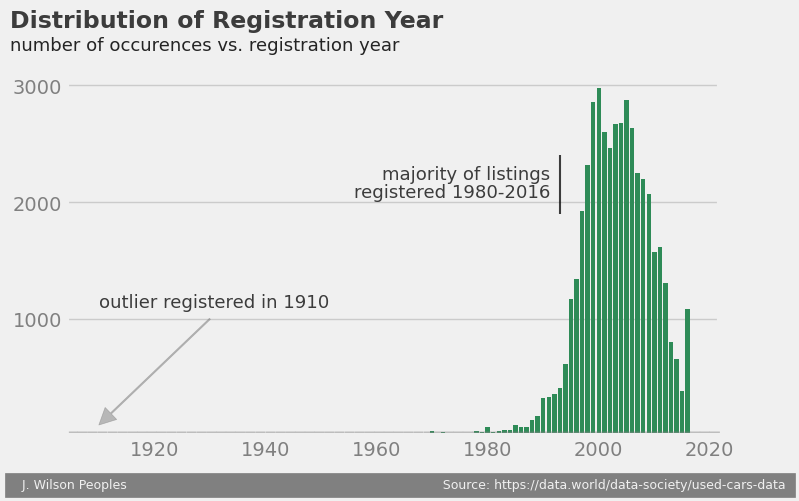

In [35]:
fig,ax = plt.subplots(figsize = (7.5,4.5))
ax.bar(autos['registration_year'].value_counts().index, autos['registration_year'].value_counts().values, color = 'seagreen')
#___________________________________________________________
#format ticks
ax.tick_params(colors = 'grey', which = 'both')
ax.grid(visible = False, axis = 'x')
ax.set_yticks([0,1000,2000,3000])
ax.set_yticklabels(['','1000','2000','3000'])
ax.text(1904.5,75,'__________________________________________________________________', color = 'grey', alpha = .45)
#___________________________________________________________
#create title and subtitle
ax.text(1894,3500, 'Distribution of Registration Year', weight = 'bold', size = 17, alpha = .75)
ax.text(1894,3300, 'number of occurences vs. registration year', alpha = .85, size = 13)
ax.text(x = 1894, y = -450,
    s = '   J. Wilson Peoples                                                                               Source: https://data.world/data-society/used-cars-data ',
    fontsize = 9, color = '#f0f0f0', backgroundcolor = 'grey')

ax.annotate("", xy=(1910,90), xytext=(1930,1000),
            arrowprops=dict(width = 1, color = 'grey',alpha = .5))
ax.text(1910, 1100,"outlier registered in 1910",size = 13, alpha = .75)

ax.vlines(x = 1993, ymin = 1900, ymax = 2400, color = 'black', linewidth = 1.5, alpha = .75)
ax.text(1961, 2200,"majority of listings ",size = 13, alpha = .75)
ax.text(1956, 2040,"registered 1980-2016",size = 13, alpha = .75)

We can tell from the x-axis that there are still a few outliers. We'll restrict to data for which registration year is greater than 1955. 

In [36]:
autos['registration_year'] = autos.loc[autos['registration_year'].between(1955,2016),'registration_year']

### power_ps

To spot any potential problems with this column, let's look at a simple scatterplot. 

Text(-2500, -1100, '   J. Wilson Peoples                                                                               Source: https://data.world/data-society/used-cars-data ')

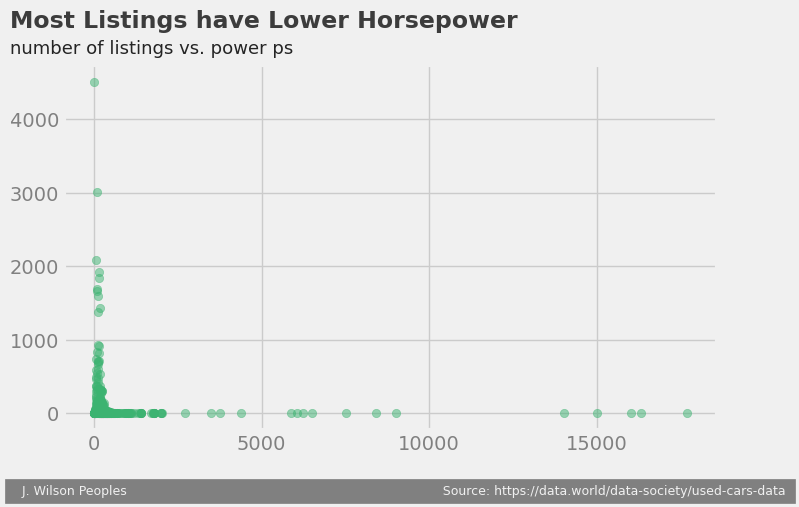

In [74]:
fig,ax = plt.subplots(figsize = (7.5,4.5))
ax.scatter(autos['power_ps'].value_counts().index, autos['power_ps'].value_counts().values, alpha = .5, color = 'mediumseagreen')
ax.tick_params(colors = 'grey', which = 'both')
ax.set_xticks([0,5000,10000,15000])

#___________________________________________________________
#create title and subtitle
ax.text(-2500,5250, 'Most Listings have Lower Horsepower', weight = 'bold', size = 17, alpha = .75)
ax.text(-2500,4900, 'number of listings vs. power ps', alpha = .85, size = 13)
ax.text(x = -2500, y = -1100,
    s = '   J. Wilson Peoples                                                                               Source: https://data.world/data-society/used-cars-data ',
    fontsize = 9, color = '#f0f0f0', backgroundcolor = 'grey')

The range of values here seems quite reasonable. There are quite a few listing with low horsepower, and few with a slightly larger amount. These larger entries are still within a reasonable scale, so we won't remove them.

### odometer_km

Let's take a closer look at the odometer_km column. 

Text(-22000, -5500, '   J. Wilson Peoples                                                                               Source: https://data.world/data-society/used-cars-data ')

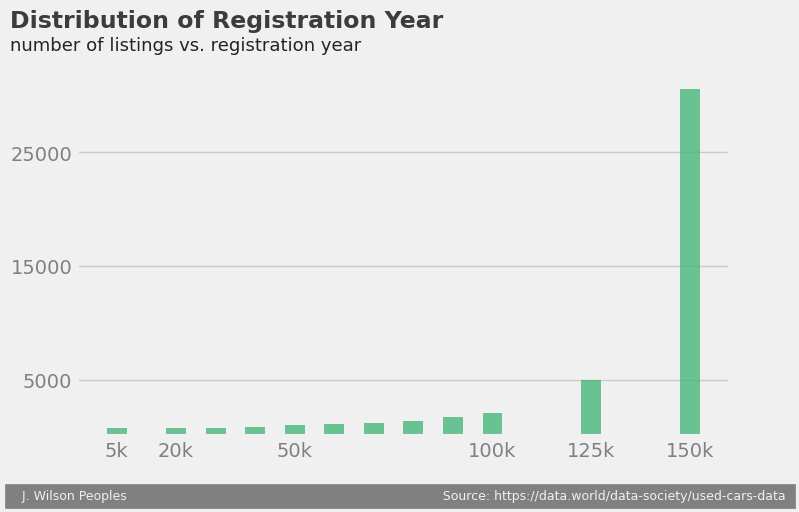

In [38]:
fig,ax = plt.subplots(figsize = (7.5,4.5))
ax.bar(autos['odometer_km'].value_counts().index, autos['odometer_km'].value_counts().values,width = 5000, alpha = .75, color = 'mediumseagreen')
#format ticks
ax.tick_params(colors = 'grey', which = 'both')
ax.set_xticks([5000,20000,30000,40000,50000,60000,70000,80000,90000,100000,125000,150000])
ax.set_xticklabels(['5k','20k','','','50k','','','','','100k','125k','150k'])
ax.set_yticks([5000,15000,25000])
ax.grid(visible = False, axis = 'x')
#___________________________________________________________
#create title and subtitle
ax.text(-22000,36000, 'Distribution of Registration Year', weight = 'bold', size = 17, alpha = .75)
ax.text(-22000,34000, 'number of listings vs. registration year', alpha = .85, size = 13)
ax.text(x = -22000, y = -5500,
    s = '   J. Wilson Peoples                                                                               Source: https://data.world/data-society/used-cars-data ',
    fontsize = 9, color = '#f0f0f0', backgroundcolor = 'grey')

We see that the number of listings gradually rises as the milage increases. This is expected, as these are used car listings. Nothing looks wrong with this column, so we'll move on to the registration month. 

### registration_month

This particular column won't come into play in our analysis, so we'll go ahead and drop it. 

In [39]:
autos = autos.drop('registration_month', axis = 1)

This concludes the cleaning of the numeric columns. Now, we can move on to check each categorical column. 

## Categorical Columns

### ab_test, vehicle_type, gear_box, fuel_type, and unrepaired_damage

For these columns, there are a relatively small number of unique answers. Hence, we can just use the .vallue_counts() method to make sure the answers make sense, and that each column still contains relevant information. 

In [40]:
cols = ['ab_test','vehicle_type','gear_box','fuel_type','unrepaired_damage']
for col in cols:
    print(autos[col].value_counts())

test       24368
control    22905
Name: ab_test, dtype: int64
limousine     14183
kleinwagen    11653
kombi          9289
bus            4366
cabrio         3005
coupe          2458
suv            1955
andere          364
Name: vehicle_type, dtype: int64
manuell      37377
automatik     9896
Name: gear_box, dtype: int64
benzin     32171
diesel     14278
lpg          679
cng           70
hybrid        36
andere        21
elektro       18
Name: fuel_type, dtype: int64
False    42703
True      4570
Name: unrepaired_damage, dtype: int64


Nothing suspicious for either of these columns. We're ready to move on to the model column, where the number of unique answers is much bigger. 

### model 

Let's take a look at the unique answers for this column. 

In [41]:
autos['model'].value_counts()

golf          4004
andere        3470
3er           2689
polo          1749
corsa         1720
              ... 
charade          3
145              2
kappa            2
rangerover       1
b_max            1
Name: model, Length: 243, dtype: int64

We see that there are a number of models that only show up a few times. Let's go ahead and restrict ourselves to listings of models which were seen at least 10 times. 

In [42]:
frequent_models_mask = (autos['model'].value_counts().values > 9)
frequent_models = autos['model'].value_counts().index[frequent_models_mask]
autos = autos.loc[autos.loc[:,'model'].isin(frequent_models),:]

We also noticed that some entries involve an underscore. This could result in range_rover and rangerover, for instance, being interpreted as different models. To fix this, we'll simply remove all underscores from the answers for this column. 

In [43]:
autos['model'] = autos.loc[:,'model'].str.replace('_','',regex = False)

Before moving on, let's take a quick look at a wordcloud showing how frequently each model occurs. 

(-0.5, 399.5, 199.5, -0.5)

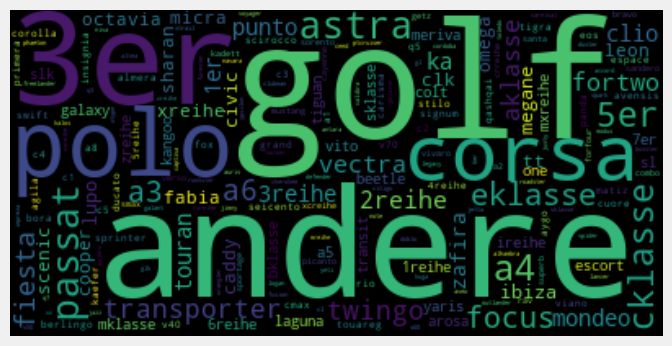

In [44]:
from wordcloud import WordCloud
# using word frequency list:
#word_freq = open("/tmp/word_freq.txt").read()
# say it looks like this:
word_freq = autos['model'].value_counts().to_dict()
text = " ".join([(k + " ")*v for k,v in word_freq.items()])

# Generate a word cloud image
wordcloud = WordCloud(collocations=False).generate(text)
fig,ax = plt.subplots(figsize = (7.5,4.5))
ax.imshow(wordcloud, interpolation = 'bilinear')
ax.axis('off')

A quick look confirms our cleaning efforts have left his column ready for further analysis. This concludes the cleaning of the model column. 

### brand

Let's take a look at the unique answers for this column. To do this, we'll generate a word cloud.  

(-0.5, 399.5, 199.5, -0.5)

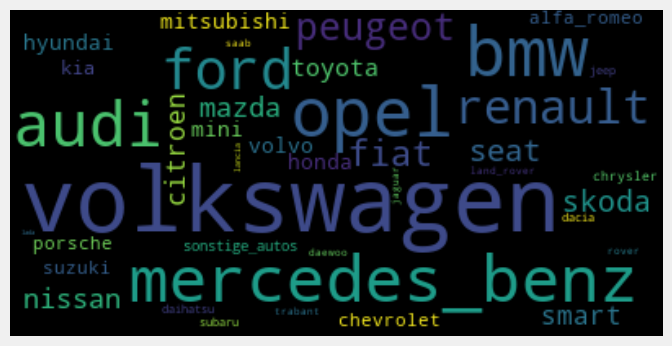

In [45]:
from wordcloud import WordCloud
# using word frequency list:
#word_freq = open("/tmp/word_freq.txt").read()
# say it looks like this:
word_freq = autos['brand'].value_counts().to_dict()
text = " ".join([(k + " ")*v for k,v in word_freq.items()])

# Generate a word cloud image
wordcloud = WordCloud(collocations=False).generate(text)
fig,ax = plt.subplots(figsize = (7.5,4.5))
ax.imshow(wordcloud, interpolation = 'bilinear')
ax.axis('off')

We can also print out each answer explicitly. 

In [46]:
autos['brand'].value_counts()

volkswagen        10160
opel               5201
bmw                5089
mercedes_benz      4583
audi               4119
ford               3325
renault            2291
peugeot            1344
fiat               1226
seat                901
skoda               773
nissan              725
mazda               717
smart               674
citroen             667
toyota              600
hyundai             457
volvo               427
mini                417
mitsubishi          389
honda               376
kia                 337
alfa_romeo          308
porsche             283
suzuki              279
chevrolet           262
sonstige_autos      176
chrysler            156
dacia               122
daihatsu            112
jeep                107
subaru              101
land_rover           85
jaguar               73
saab                 72
daewoo               65
trabant              61
rover                61
lancia               45
lada                 24
Name: brand, dtype: int64

Looking through this list, the only suspcious thing we see are two separate brands - rover and land_rover. Are these brands actually different? Let's look at the unique answers for model for each entry with a brand of rover, as well as land_rover. 

In [47]:
#models when brand is rover
autos[autos['brand'] == 'rover']['model'].value_counts()

andere        57
freelander     2
discovery      1
200            1
Name: model, dtype: int64

In [48]:
#models when brand is land_rover
autos[autos['brand'] == 'land_rover']['model'].value_counts()

freelander         32
defender           23
discovery          13
rangeroversport    12
andere              4
a4                  1
Name: model, dtype: int64

Since the present models are so similar, it seems this is referring to the same brand. To fix this, we'll just rename all 'rover' answers to 'land_rover'.

In [49]:
autos['brand'] = autos.loc[:,'brand'].str.replace('land_','').str.replace('rover','land_rover')

That concludes the cleaning of the brand column. 

### postal_code

Since there are many unique postal codes, let's take a look at the first few. 

In [50]:
autos['postal_code'].head()

0    79588
1    71034
2    35394
3    33729
4    39218
Name: postal_code, dtype: int64

The main reality check to perform for this column is to make sure that each entry represents a real postal code. One basic thing to do is to check how many digits each answer is. 

To do this, we'll first convert the column to string, and then use the .len() vectorized string method to check the length of each answer. Then, we'll use the .value_counts() method to see how many times postal codes of each length occur. 

In [51]:
autos['postal_code'].astype(str).str.len().value_counts()

5    44979
4     2211
Name: postal_code, dtype: int64

We see that while most postal codes are 5 digits, some are 4 digits. A quick google search reveals that Germany used a 4 digit postal code system not long ago. Hence, a 4 digit postal code is potentially valid. We'll go ahead and leave this column as is. 

This concludes the data cleaning process. Now, we'll take a look at the datetime columns  to analyze some metadata of the crawler which collected the dataset. 

# Initial Data Analysis: Crawler Metadata 

In this section, we'll verify that the columns with Crawler Metadata are clean, and perform some preliminary analysis regarding the crawler itself. To start, let's look at the date_crawled column. 

### date_crawled

This data was crawled in 2016. Since the date_crawled column is in 'YYYY-MM-DD' format, let's make sure every date crawled occured in 2016 by checking the first 4 characters of the responses for this column. 

In [52]:
autos['date_crawled'].str[:4].value_counts()

2016    47190
Name: date_crawled, dtype: int64

The crawler metadata looks corect so far. In the next code cell, we'll enumerate the days crawled, with 1 corresponding to the first day. 

In [53]:
#create a series indicating which day in march repsonse was crawled on 
march_days_crawled = autos[
    autos['date_crawled'
        ].str[5:7].str.contains('03')][         #exract rows where month crawled is march
            'date_crawled'].str[8:10            #look at the day crawled of those rows
                ].astype(int)-4                 #convert to a number where 1 represents
                                                #first day crawled, aka march 5

#create a series indicating which day in april repsonse was crawled on 
april_days_crawled = march_days_crawled.max() + autos[      #add maximum of enumeration for march days
    autos['date_crawled'].str[5:7].str.contains('04')][
        'date_crawled'].str[8:10
            ].astype(int)

#combine above series into single series
days_crawled = pd.concat([march_days_crawled,april_days_crawled]).sort_index()

Now that we've enumerated the days crawled from 1 to 35, let's look which days the crawler was most acitve.  

Text(-5, -500, '   J. Wilson Peoples                                                                 Source: https://data.world/data-society/used-cars-data ')

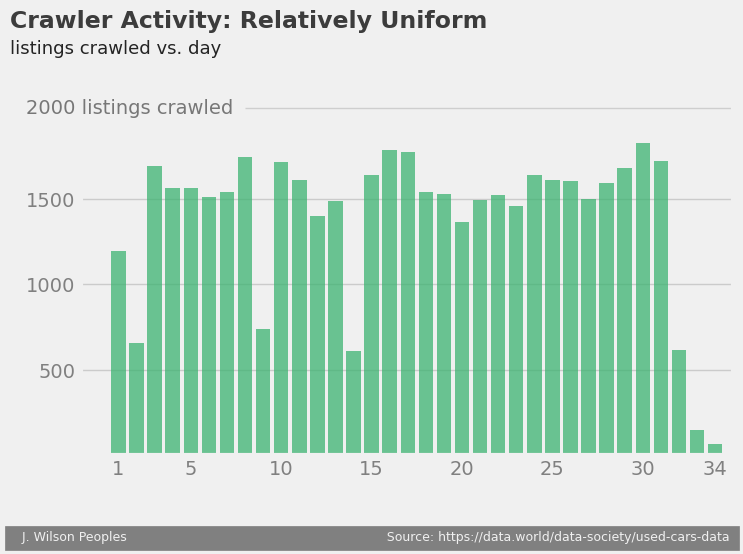

In [54]:
#_____________________________________
#initialize plot
fig, ax = plt.subplots(figsize = (7.5,4.5))
ax.bar(days_crawled.value_counts().index, days_crawled.value_counts().values, alpha = .75, color = 'mediumseagreen' )
#______________________________________
#format x and y ticks
ax.set_xticks([1,5,10,15,20,25,30,34])
ax.set_xlim(right = 35)

ax.set_yticks([0,500,1000,1500])
ax.set_yticklabels(['','500','1000','1500'])

ax.grid(visible=False, axis = 'x')
ax.tick_params(colors = 'grey', which = 'both')
#manually label 2000
ax.text(x = -4.1, y = 2000, s = '2000 listings crawled', color = 'black', alpha = .5)
ax.hlines(y = 2030, xmin =8, xmax = 36,color = 'grey', linewidth = 1, alpha = .3)
#__________________________________________
#ax.annotate("", xy=(0.5, 0.5), xytext=(0, 0),
#            arrowprops=dict(arrowstyle="->"))
#create title and subtitle
ax.text(-5,2500, 'Crawler Activity: Relatively Uniform', weight = 'bold', size = 17, alpha = .75)
ax.text(-5,2350, 'listings crawled vs. day', alpha = .85, size = 13)
ax.text(x = -5, y = -500,
    s = '   J. Wilson Peoples                                                                 Source: https://data.world/data-society/used-cars-data ',
    fontsize = 9, color = '#f0f0f0', backgroundcolor = 'grey')

Here, we can see that the crawler is fairly uniform from days 3-31, with slightly less activity on the first two days, as well as the last two days. 

Now, let's take a look at the activity by hour of the day. To do this, we'll first create a series which contains the hour crawled. Then, we'll use the .value_counts() method to give us a barplot. 

In [55]:
hour_crawled = autos['date_crawled'     #at date crawled column,
    ].str[10:13                         #extract characters 10,11,12
        ].astype(int).value_counts()    #convert to integer, and obtain distribution 

Now, we'll make the plot. 

Text(-3.7, -750, '   J. Wilson Peoples                                                              Source: https://data.world/data-society/used-cars-data ')

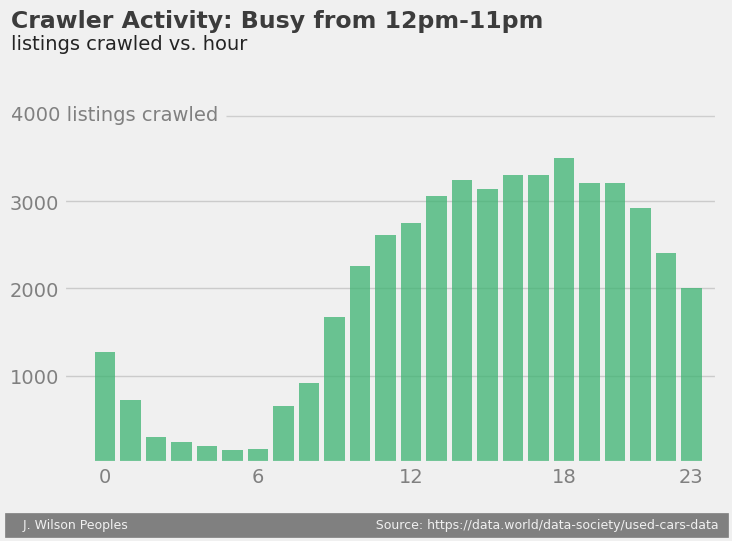

In [56]:
#initialize plot
fig, ax = plt.subplots(figsize = (7.5,4.5))
ax.bar(hour_crawled.index, hour_crawled.values, alpha = .75, color = 'mediumseagreen' )
#______________________________________
#format x and y ticks
ax.set_xticks([0,6,12,18,23])
ax.set_xlim(right = 24)
ax.set_yticks([1000,2000,3000])
ax.set_yticklabels(['1000','2000','3000'])

ax.grid(visible=False, axis = 'x')
ax.tick_params(colors = 'grey', which = 'both')
#manually label 4000
ax.text(x = -3.7, y = 3928, s = '4000 listings crawled', color = 'grey',alpha = 1)
ax.hlines(y = 3985, xmin =4.75, xmax = 25,color = 'grey', linewidth = 1, alpha = .3)
#__________________________________________
#ax.annotate("", xy=(0.5, 0.5), xytext=(0, 0),
#            arrowprops=dict(arrowstyle="->"))
#create title and subtitle
ax.text(-3.7,5000, 'Crawler Activity: Busy from 12pm-11pm', weight = 'bold', size = 17, alpha = .75)
ax.text(-3.7,4750, 'listings crawled vs. hour', alpha = .85)
ax.text(x = -3.7, y = -750,
    s = '   J. Wilson Peoples                                                              Source: https://data.world/data-society/used-cars-data ',
    fontsize = 9, color = '#f0f0f0', backgroundcolor = 'grey')

Here, we can see that the crawler begins becoming more active around 7am. This activity increases, peaks around 4pm-8pm, and then gradually descreases from 9pm - 5am. 

Now, let's take a look at the date_created column. In particular, let's see in which years ads were created. 

In [57]:
autos['date_created'].str[0:4].value_counts()

2016    47184
2015        6
Name: date_created, dtype: int64

Let's take a closer look at those 2015 listings. 

In [58]:
autos[autos['date_created'].str[0:4]== '2015']

,date_crawled,name,price,ab_test,vehicle_type,registration_year,gear_box,power_ps,model,odometer_km,fuel_type,brand,unrepaired_damage,date_created,postal_code,last_seen
2243,2016-03-23 23:37:01,Gepflegter_Peugoet_207_Sport_VTi_Sport,5499,control,limousine,2009.0,manuell,95,2reihe,70000,benzin,peugeot,False,2015-11-10 00:00:00,22941,2016-04-07 09:15:21
20649,2016-03-08 17:57:45,Cabrio_Peugeot_206_CC_Platinium_zum_Winterpreis!,5200,control,cabrio,2006.0,manuell,109,2reihe,80000,benzin,peugeot,False,2015-08-10 00:00:00,26382,2016-04-05 20:46:54
22781,2016-03-23 01:48:59,Mercedes_Benz_C220_BT__7G_Tronic_AMG__Modellja...,47900,test,limousine,2014.0,automatik,0,cklasse,20000,diesel,mercedes_benz,False,2015-06-11 00:00:00,46145,2016-04-06 09:47:02
27986,2016-03-18 10:41:20,Subaru_Impreza_GC_8__2.0__4x4__Super_Optik__Kl...,900,control,limousine,1997.0,automatik,115,impreza,150000,benzin,subaru,False,2015-12-05 00:00:00,2943,2016-03-23 13:56:25
34883,2016-03-05 21:51:02,OPEL_CORSA_Apfelgruen_dringend_zu_verkaufen!,9500,test,kleinwagen,2013.0,manuell,90,corsa,50000,diesel,opel,False,2015-09-09 00:00:00,98739,2016-04-05 17:46:04
36993,2016-03-15 23:57:10,Smart_fortwo_coupé_pulse__45kW/61_PS__schwarz,2400,control,limousine,2004.0,automatik,61,fortwo,90000,benzin,smart,False,2015-12-30 00:00:00,10315,2016-04-06 15:17:11


Since none of these were created in months Jan - April, we can look at the month to determine which ads were created during the crawl period (march and april), and which ads were created before (any other month). Let's look to see the percentage of ads which were created during the crawl period. 

In [59]:
autos['date_created'].str[5:7].value_counts(normalize=True)

03    0.837105
04    0.161263
02    0.001293
01    0.000212
12    0.000042
11    0.000021
08    0.000021
06    0.000021
09    0.000021
Name: date_created, dtype: float64

Less than .2% of the total data was created before the crawl period. Hence, we'll just drop all the ads created before the crawl period, just for good measure. 

In [62]:
autos = autos.loc[(autos['date_created'].str[5:7] == '03') | (autos['date_created'].str[5:7] == '04'),:]

This completes our cleaning of the datetime columns, and our crawler metadata analysis. We'll conclude the notebook by analyzing how the price of the listing is related to various other aspects of the listing. 

# Data Analysis: 

In this section, we'll use the cleaned dataset to investigate how the listing price of a vehicle depends on some of the other features of the dataset. To start, let's take a look at the mean price by milage. Overall, one would suspect that for the overall price would decrease as mileage increases. 

Let's look at the 4 most popular brands, to see how the price relates to the number of miles, and how this relationship may change from brand to brand. 

Text(41000, 23000, 'Mercedes')

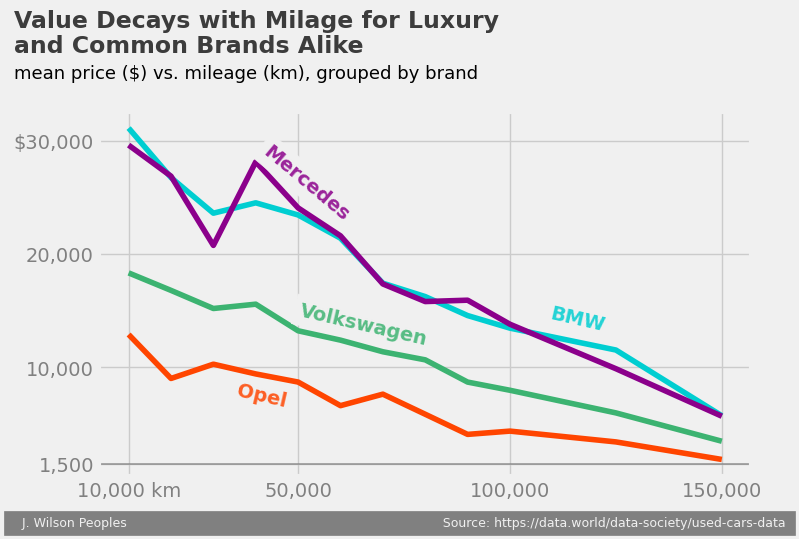

In [412]:
popular_brands = autos['brand'].value_counts().index[:4]
colors = ['mediumseagreen','orangered', 'darkturquoise','darkmagenta']
fig,ax = plt.subplots(figsize = (7.5,4.5))
for i,brand in enumerate(popular_brands):
    df = autos.loc[(autos['brand'] == brand) & (autos['odometer_km'] > 6000),:]
    plot_data = df.groupby('odometer_km')['price'].mean()
    ax.plot(plot_data.index, plot_data.values, label = brand, color = colors[i])

ax.axhline(y = 1500, color = 'grey', linewidth = 1.3, alpha = .7)
ax.tick_params(colors = 'grey', which = 'both')
ax.set_xticks([10000,50000,100000,150000])
ax.set_yticks([1500,10000,20000,30000])
ax.set_yticklabels(['1,500','10,000','20,000','$30,000'])
ax.set_xticklabels(['10,000 km','50,000','100,000','150,000'])
#ax.grid(visible=False, which = 'minor')

#ax.set_xticklabels([])
#ax.set_yticklabels([])
#___________________________________________________________
#create title and subtitle
ax.text(-17000,40000, 'Value Decays with Milage for Luxury', weight = 'bold', size = 17, alpha = .75)
ax.text(-17000,37800, 'and Common Brands Alike', weight = 'bold', size = 17, alpha = .75)
ax.text(-17000,35500, 'mean price ($) vs. mileage (km), grouped by brand', size = 13)
ax.text(x = -18000, y = -4000,
    s = '   J. Wilson Peoples                                                                               Source: https://data.world/data-society/used-cars-data ',
    fontsize = 9, color = '#f0f0f0', backgroundcolor = 'grey')

ax.text(x=35000,y = 6500, s= 'Opel', rotation = -13, color = colors[1], weight = 'bold', alpha = .85, backgroundcolor = '#f0f0f0')
ax.text(x=50000,y = 12000, s= 'Volkswagen', rotation = -13, color = colors[0],weight = 'bold', alpha = .85, backgroundcolor = '#f0f0f0')
ax.text(x=109000,y = 13200, s= 'BMW', rotation = -13, color = colors[2], weight = 'bold',alpha = .85, backgroundcolor = '#f0f0f0')
ax.text(x=41000,y = 23000, s= 'Mercedes', rotation = -40, color = colors[3], weight = 'bold', alpha = .85, backgroundcolor = '#f0f0f0')
#ax.hlines(xmin=0, xmax = 150000, y = 3000, color = 'grey', alpha = .75, linewidth = 1)
#ax.vlines(x = 4500, ymin = 3000, ymax = 24000, color = 'grey', linewidth = 1, alpha = .75 )

In the above, we see that while luxury cars (Mercedes Benz and BMW) are more expensive, their price decays as mileage increases at a similar rate. I.e., luxury cars do not seem to hold their value more than more common cars. 

Two key factors that may impact the value of a car which are not addressed in the above plot are 
- the age of the car, and 
- whether or not the car is damaged. 

We investigate both of these relationships simultaneously in the following scatter plot. 

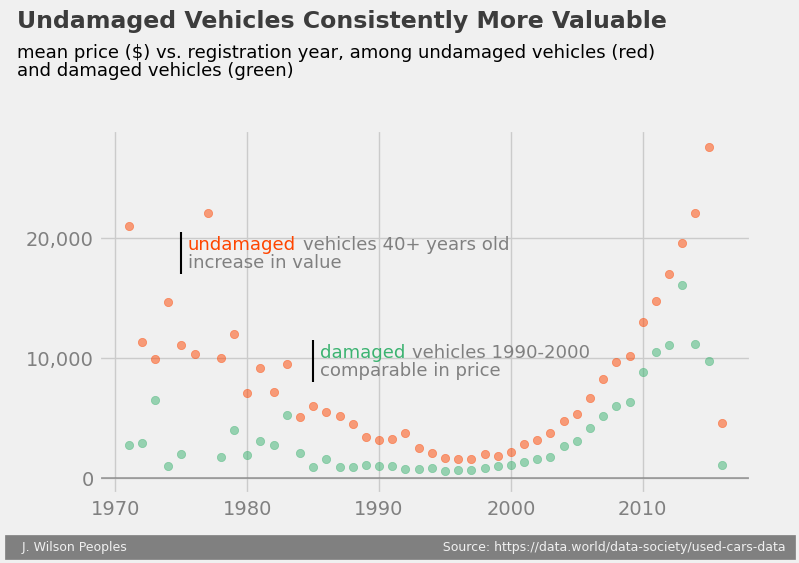

In [411]:
fig,ax = plt.subplots(figsize = (7.5,4.5))
df1 = autos.loc[(autos['unrepaired_damage']) & (autos['registration_year']>1970),:]
df2 = autos.loc[(~autos['unrepaired_damage']) &(autos['registration_year']>1970),:]
plot_data_1 = df1.groupby('registration_year')['price'].mean()
plot_data_2 = df2.groupby('registration_year')['price'].mean()
ax.scatter(plot_data_1.index, plot_data_1.values, alpha = .5, color = colors[0], label = 'damaged vehicle')
ax.scatter(plot_data_2.index, plot_data_2.values, alpha = .5, color = colors[1], label = 'undamaged vehicle')


ax.set_yticks([0,10000,20000,30000])
ax.set_yticklabels(['0','10,000','20,000','$30,000'])
ax.axhline(y = 0, color = 'grey', linewidth = 1.3, alpha = .7)
ax.tick_params(colors = 'grey', which = 'both')
#___________________________________________________________
#create title and subtitle
ax.text(1962.5,37500, 'Undamaged Vehicles Consistently More Valuable', weight = 'bold', size = 17, alpha = .75)
ax.text(1962.5,35000, 'mean price ($) vs. registration year, among undamaged vehicles (red)', size = 13)
ax.text(1962.5,33500, 'and damaged vehicles (green)', size = 13)
ax.text(x = 1962, y = -6000,
    s = '   J. Wilson Peoples                                                                               Source: https://data.world/data-society/used-cars-data ',
    fontsize = 9, color = '#f0f0f0', backgroundcolor = 'grey')
ax.text(x = 1975.5, y = 19000, s ='                    vehicles 40+ years old', color = 'grey', size = 13)
ax.text(x = 1975.5, y = 19000, s ='undamaged', size = 13, color = colors[1])
ax.text(x = 1975.5, y = 17500, s ='increase in value', size = 13, color = 'grey')
ax.vlines(x = 1975, ymin = 17000,ymax =20500, color = 'black', linewidth = 1.5)

ax.text(x = 1985.5, y = 10000, s ='                vehicles 1990-2000', color = 'grey', size = 13)
ax.text(x = 1985.5, y = 10000, s ='damaged', size = 13, color = colors[0])
ax.text(x = 1985.5, y = 8500, s ='comparable in price', color = 'grey', size = 13)
ax.vlines(x = 1985, ymin = 8000,ymax =11500, color = 'black', linewidth = 1.5)


We see here that vehicles from 1990-2000 have lower prices, regardless of damage. Interestingly, the price difference between damaged and undamaged vehicles in this range lessens. Undamaged vehicles which are 40+ years old, however, tend to have a higher value. In this range, the difference between damaged and undamaged vehicles is more pronounced. 

To conclude, we'll look at how price is affect by vehicle type. 

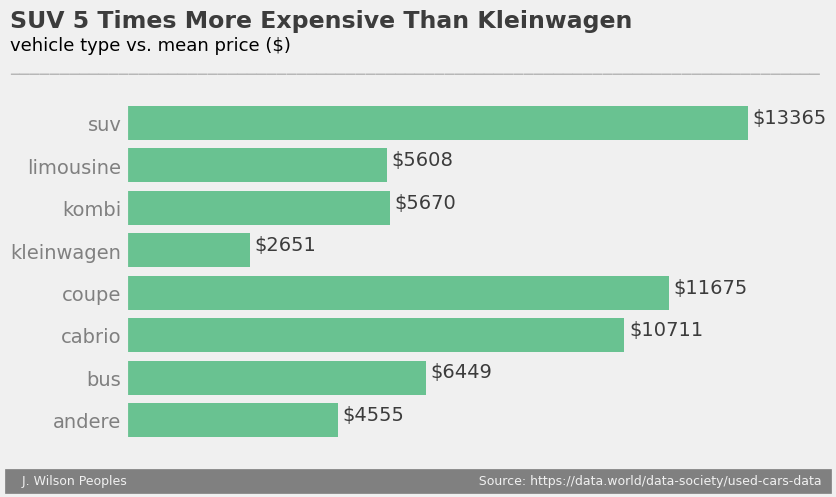

In [410]:
fig,ax = plt.subplots(figsize = (7.5,4.5))
plot_data = autos.groupby('vehicle_type')['price'].mean()
ax.barh(plot_data.index, plot_data.values, alpha = .75, color = 'mediumseagreen')
ax.grid(visible = False)
ax.tick_params(colors = 'grey', which = 'both')
ax.set_xticks([])

ax.text(-2500,9.25, 'SUV 5 Times More Expensive Than Kleinwagen', weight = 'bold', size = 17, alpha = .75)
ax.text(-2500,8.70, 'vehicle type vs. mean price ($)', size = 13)
ax.text(x = -2500, y = -1.5,
    s = '   J. Wilson Peoples                                                                                        Source: https://data.world/data-society/used-cars-data ',
    fontsize = 9, color = '#f0f0f0', backgroundcolor = 'grey')
ax.text(x=-2500, y = 8.25, s = '__________________________________________________________________________________', 
    color = 'grey', alpha = .5)
for i,val in enumerate(plot_data.values):
    val = int(np.round(val))
    ax.text(val + 100,i, s = f"${val}", alpha = .75)

We notice that SUV, coupes, and cabrio have a significatly higher price than the other vehicle types. This could be due to a large portion of the SUV,coupe, and cabrio listings being a luxury brand. Let's look at the distribution of brands for SUV, for instance. 

In [424]:
autos[autos['vehicle_type'] == 'suv']['brand'].value_counts(normalize=True)[0:10]

volkswagen       0.124546
mercedes_benz    0.119875
bmw              0.071614
nissan           0.063830
kia              0.057602
hyundai          0.056046
jeep             0.054489
ford             0.047743
suzuki           0.047743
land_rover       0.044629
Name: brand, dtype: float64

Indeed, we see Mercedes and BMW make up a large percentage of the SUV's. Looking more closely for coupe and cabrio yields similar findings. 

# Conclusion

In this notebook, we cleaned and analyzed a dataset containing used car listings from German ebay website [ebay Kleinazeigan](https://www.ebay-kleinanzeigen.de/). During the analysis, we investigated how the price of a used car is related to various factors, such as age, milage, and brand. 

In the process, we demonstrated various data cleaning techniques. In particular, we were able to fill many missing values by extracting relevant information from the name of the used car listing. We were also able to get a better idea for how the data was collected, through cleaning and analyzing the crawler's metadata. 

Here is a summary of our findings regarding how the price of a used car depends on milage, age, and amount of damage. 

- While luxury cars (Mercedes and BMW) are generally more expensive, their value decays linearly with milage at a similar rate to their non luxury counterparts (opel and volkswagen). 
- We also found that significantly older cars (>40 years old), if not damaged, become more valuable than undamaged cars which are only 20-30 years old. 
- For cars between 20 and 30 years old, the presence of unrepaired damaged affects the cost less. 

Thank you for reading this notebook, and have a great day! 